Best Threshold: 0.5000
AUC: 1.0000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


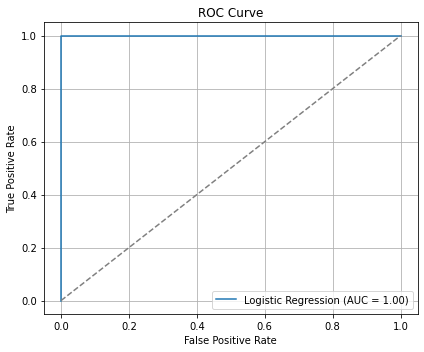

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("flipkart_aspect.csv")

# Drop non-numeric columns like product name
numeric_df = df.select_dtypes(include=[np.number])

# Fill missing values with 0 (or use mean if preferred)
imputer = SimpleImputer(strategy="constant", fill_value=0)
X_imputed = imputer.fit_transform(numeric_df)

# Compute average sentiment per product
df['average_sentiment'] = X_imputed.mean(axis=1)

# Create binary label using median as initial threshold
initial_threshold = np.median(df['average_sentiment'])
df['is_useful'] = (df['average_sentiment'] >= initial_threshold).astype(int)

# Feature and target
X = df[['average_sentiment']].values
y = df['is_useful'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Find best threshold (Youden’s J statistic)
youden_index = np.argmax(tpr - fpr)
best_threshold = thresholds[youden_index]

# Predict using best threshold
y_pred = (y_probs >= best_threshold).astype(int)

# Evaluation
print(f"Best Threshold: {best_threshold:.4f}")
print(f"AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Plot ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

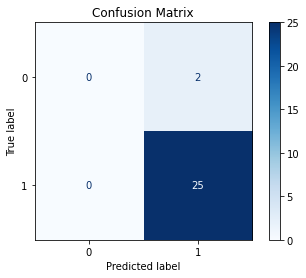

In [3]:

#Onida AIr Conditioner
new_product_aspects = {
    'air flow_sentiment': 0.04,
    'awesome_sentiment': 0.02,
    'build quality_sentiment': 0.05,
    'cooling_sentiment': 0.06,
    'design_sentiment': 0.01,
    'noise_sentiment': -0.01,
    'price_sentiment': 0.03,
    'service_sentiment': 0.02,
    'speed_sentiment': 0.04
}
new_aspect_values = list(new_product_aspects.values())
# Compute average sentiment for the new product
new_avg_sentiment = np.mean(new_aspect_values)

# Predict probability and classify based on threshold
prob = model.predict_proba([[new_avg_sentiment]])[0][1]
label = "Useful" if prob >= best_threshold else "Not Useful"

print(f"Average Sentiment Score: {new_avg_sentiment:.4f}")
print(f"Predicted Probability of Usefulness: {prob:.4f}")
print(f"Predicted Label: {label}")

Average Sentiment Score: 0.0289
Predicted Probability of Usefulness: 0.5011
Predicted Label: Useful


In [4]:
import joblib

# Save the trained model
joblib.dump(model, 'logistic_model.pkl')

# Save the best threshold
joblib.dump(best_threshold, 'best_threshold.pkl')

['best_threshold.pkl']

In [5]:
model = joblib.load("logistic_model.pkl")
best_threshold = joblib.load("best_threshold.pkl")

In [ ]:
import numpy as np
import streamlit as st
import joblib

# Load your trained model and threshold
model = joblib.load("logistic_model.pkl")  # Make sure this file is in the same directory
best_threshold = joblib.load("best_threshold.pkl")

# Title
st.title("Product Usefulness Predictor")
st.write("Enter aspect-based sentiment scores for a product to check if it's Useful or Not Useful")

# Input sliders for each aspect
air_flow = st.slider('Air Flow Sentiment', -1.0, 1.0, 0.0, 0.01)
awesome = st.slider('Awesome Sentiment', -1.0, 1.0, 0.0, 0.01)
build_quality = st.slider('Build Quality Sentiment', -1.0, 1.0, 0.0, 0.01)
cooling = st.slider('Cooling Sentiment', -1.0, 1.0, 0.0, 0.01)
design = st.slider('Design Sentiment', -1.0, 1.0, 0.0, 0.01)
noise = st.slider('Noise Sentiment', -1.0, 1.0, 0.0, 0.01)
price = st.slider('Price Sentiment', -1.0, 1.0, 0.0, 0.01)
service = st.slider('Service Sentiment', -1.0, 1.0, 0.0, 0.01)
speed = st.slider('Speed Sentiment', -1.0, 1.0, 0.0, 0.01)

# Compute average sentiment
aspect_scores = [air_flow, awesome, build_quality, cooling, design, noise, price, service, speed]
avg_sentiment = np.mean(aspect_scores)

# Predict using trained model
predicted_prob = model.predict_proba([[avg_sentiment]])[0][1]
label = "Useful" if predicted_prob >= best_threshold else "Not Useful"

# Show prediction
st.subheader("Results")
st.write(f"**Average Sentiment Score:** {avg_sentiment:.4f}")
st.write(f"**Predicted Probability of Usefulness:** {predicted_prob:.4f}")
st.write(f"**Predicted Label:** {label}")


2025-04-21 20:13:35.318 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 20:13:35.429 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-04-21 20:13:35.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 20:13:35.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 20:13:35.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 20:13:35.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 20:13:35.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21

In [8]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 KB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 KB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.7/325.7 KB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
